In [1]:
%matplotlib ipympl

In [2]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from h3_helper import *
from s2_helper import *
from eaggr_helper import *
import pyproj

In [3]:
vector = os.path.dirname(os.getcwd()) + r'\data\eesti_clipped\land_cover\CorineEestiWGS84.gpkg'

In [4]:
corine_legend = pd.read_pickle(os.path.dirname(os.getcwd()) + r'/data/eesti_clipped/land_cover/corine_legend.pkl')

In [5]:
corine_legend['CLC_CODE'] = corine_legend['CLC_CODE'].astype('str')

In [6]:
corine_original = gpd.read_file(vector)
corine_original['code_18'] = corine_original['code_18'].astype('str')
corine_original.crs = 'EPSG:4326'

In [7]:
corine_original = corine_original.merge(corine_legend[['CLC_CODE','LABEL3']], left_on='code_18', right_on='CLC_CODE')

In [8]:
corine_clipped = gpd.clip(corine_original,box(26.521263, 58.283163, 26.900083, 58.505180))

In [9]:
corine_clipped = corine_clipped.to_crs('EPSG:3301')

In [10]:
corine_clipped['area_original_from_geom'] = corine_clipped['geometry'].area/10000

#### H3

#### Injest corine vector at resolution 11, consequently downsample to resolution 8

In [11]:
h3_cor_11 = vector_to_h3(vector,'code_18',11,[26.521263, 58.283163, 26.900083, 58.505180])
h3_cor_11 = create_h3_geometry(h3_cor_11)

Start filling raster extent with h3 indexes at resolution 11


In [12]:
h3_cor_11 = h3_cor_11.to_crs('EPSG:3301')
h3_cor_11['area_h3_from_geom'] = h3_cor_11['geometry'].area/10000

In [13]:
h3_cor_10 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',10,'categorical')
h3_cor_10 = create_h3_geometry(h3_cor_10)

In [14]:
h3_cor_10 = h3_cor_10.to_crs('EPSG:3301')
h3_cor_10['area_h3_from_geom'] = h3_cor_10['geometry'].area/10000

In [15]:
h3_cor_9 = cell_h3_downsampling(h3_cor_11,'cell_id','code_18',9,'categorical')
h3_cor_9 = create_h3_geometry(h3_cor_9)

In [16]:
h3_cor_9 = h3_cor_9.to_crs('EPSG:3301')
h3_cor_9['area_h3_from_geom'] = h3_cor_9['geometry'].area/10000

#### Calculate areal differences

In [18]:
cor_11_grouped = h3_cor_11.groupby('code_18').count().reset_index()

In [19]:
cor_11_grouped['area_h3_from_cells_meth'] = (cor_11_grouped['cell_id']*h3.hex_area(11,'m^2'))/10000

In [20]:
cor_11_grouped['area_h3_from_cells_calc'] = (cor_11_grouped['cell_id']*h3_cor_11['geometry'][0].area)/10000

In [21]:
for_graph = cor_11_grouped.merge(corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True), on='code_18').\
merge(h3_cor_11.groupby('code_18',as_index=False)['area_h3_from_geom'].sum(), on = 'code_18')

In [22]:
for_graph

,code_18,cell_id,geometry,area_h3_from_geom_x,area_h3_from_cells_meth,area_h3_from_cells_calc,area_original_from_geom,area_h3_from_geom_y
0,111,302,302,302,64.91792,52.070195,51.456504,52.059825
1,112,19030,19030,19030,4090.68880,3281.111958,3281.158992,3280.257216
2,121,7124,7124,7124,1531.37504,1228.304865,1226.108209,1228.289192
3,122,1271,1271,1271,273.21416,219.143106,218.260755,218.918665
4,124,3251,3251,3251,698.83496,560.530477,562.064793,560.743815
5,131,257,257,257,55.24472,44.311391,43.704139,44.327494
6,133,507,507,507,108.98472,87.415857,86.518288,87.336003
7,141,683,683,683,146.81768,117.761401,117.679572,117.749583
8,142,616,616,616,132.41536,106.209404,106.537227,106.149494
9,211,104695,104695,104695,22505.23720,18051.288302,18041.234621,18041.405516


## Put as illustration about h3 internal function for calculating area

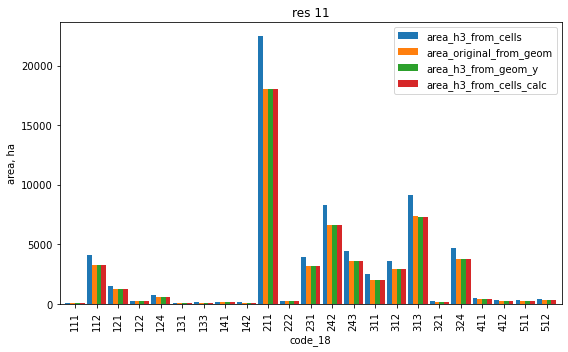

In [71]:
fig, ax = plt.subplots(figsize=(8,5))
for_graph[['code_18','area_h3_from_cells',
       'area_original_from_geom', 'area_h3_from_geom_y','area_h3_from_cells_calc']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 11',
ylabel = 'area, ha')
plt.tight_layout()

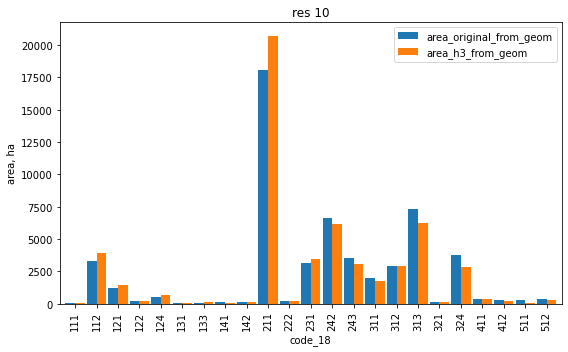

In [63]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(h3_cor_10.groupby('code_18',as_index=False)['area_h3_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_h3_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 10',
ylabel = 'area, ha')
plt.tight_layout()

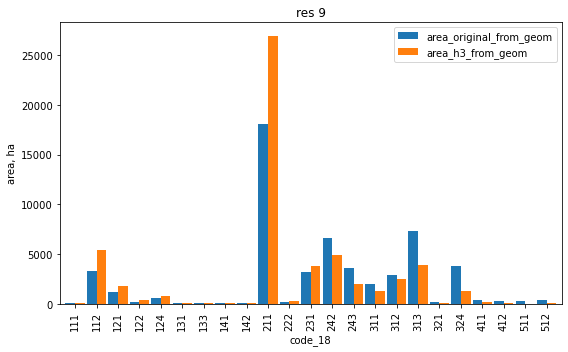

In [64]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(h3_cor_9.groupby('code_18',as_index=False)['area_h3_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_h3_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 9',
ylabel = 'area, ha')
plt.tight_layout()

### s2

In [63]:
s2_cor_18 = vector_to_s2(vector,'code_18',18,[26.521263, 58.283163, 26.900083, 58.505180])
s2_cor_18 = create_s2_geometry(s2_cor_18)
s2_cor_18 = s2_cor_18.to_crs('EPSG:3301')
s2_cor_18['area_s2_from_geom'] = s2_cor_18['geometry'].area/10000

Start filling raster extent with s2 indexes at resolution 18


In [64]:
s2_cor_17 = cell_s2_downsampling(s2_cor_18,'cell_id','code_18',17,'categorical')
s2_cor_17 = create_s2_geometry(s2_cor_17)
s2_cor_17 = s2_cor_17.to_crs('EPSG:3301')
s2_cor_17['area_s2_from_geom'] = s2_cor_17['geometry'].area/10000

In [65]:
s2_cor_16 = cell_s2_downsampling(s2_cor_17,'cell_id','code_18',16,'categorical')
s2_cor_16 = create_s2_geometry(s2_cor_16)
s2_cor_16 = s2_cor_16.to_crs('EPSG:3301')
s2_cor_16['area_s2_from_geom'] = s2_cor_16['geometry'].area/10000

In [84]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(s2_cor_18.groupby('code_18',as_index=False)['area_s2_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_s2_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 18',
ylabel = 'area, ha')
plt.tight_layout()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [83]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(s2_cor_17.groupby('code_18',as_index=False)['area_s2_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_s2_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 17',
ylabel = 'area, ha')
plt.tight_layout()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [82]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(s2_cor_16.groupby('code_18',as_index=False)['area_s2_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_s2_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 16',
ylabel = 'area, ha')
plt.tight_layout()

C:\Users\Iam\Anaconda3\envs\dggs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### EAGGR

In [73]:
eaggr_cor_20 = vector_to_eaggr_t(vector,'code_18',400,5000,box(26.521263, 58.283163, 26.900083, 58.505180))
eaggr_cor_20 = create_eaggr_geometry(eaggr_cor_20)
eaggr_cor_20 = eaggr_cor_20.to_crs('EPSG:3301')
eaggr_cor_20['area_eaggr_from_geom'] = eaggr_cor_20['geometry'].area/10000

Start filling extent with eaggr indexes at resolution


In [74]:
eaggr_cor_19 = cell_eaggr_t_downsampling(eaggr_cor_20,'cell_id','code_18',19,'categorical')
eaggr_cor_19 = create_eaggr_geometry(eaggr_cor_19)
eaggr_cor_19 = eaggr_cor_19.to_crs('EPSG:3301')
eaggr_cor_19['area_eaggr_from_geom'] = eaggr_cor_19['geometry'].area/10000

In [75]:
eaggr_cor_18 = cell_eaggr_t_downsampling(eaggr_cor_19,'cell_id','code_18',19,'categorical')
eaggr_cor_18 = create_eaggr_geometry(eaggr_cor_18)
eaggr_cor_18 = eaggr_cor_18.to_crs('EPSG:3301')
eaggr_cor_18['area_eaggr_from_geom'] = eaggr_cor_18['geometry'].area/10000

In [81]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(eaggr_cor_20.groupby('code_18',as_index=False)['area_eaggr_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_eaggr_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 18',
ylabel = 'area, ha')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(eaggr_cor_19.groupby('code_18',as_index=False)['area_eaggr_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_eaggr_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 17',
ylabel = 'area, ha')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
corine_clipped.groupby('code_18',as_index=False)['area_original_from_geom'].sum().reset_index(drop=True).\
merge(eaggr_cor_18.groupby('code_18',as_index=False)['area_eaggr_from_geom'].sum(), on = 'code_18')[['code_18',
       'area_original_from_geom', 'area_eaggr_from_geom']].plot(ax=ax, x='code_18', kind='bar', width=0.9)
ax.set(title = 'res 16',
ylabel = 'area, ha')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …